# EDA

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
# загрузка данных
items = pd.read_csv('Data/items.csv')
users = pd.read_csv('Data/users.csv')
ratings = pd.read_csv('Data/interactions.csv')

In [254]:
items

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873
...,...,...,...,...,...
59594,45640,МК Московский Комсомолец 291-2019,"Политология,Книги по экономике,Газеты",NaN,2019
59595,321616,МК Московский Комсомолец 292-2019,"Политология,Книги по экономике,Газеты",NaN,2019
59596,125582,Известия 248-249-2019,"Политология,Общая история,Газеты",NaN,2019
59597,33188,Men's Health 01-2020,Журнальные издания,NaN,2019


In [5]:
users

,user_id,age,sex
0,1,45_54,NaN
1,2,18_24,0.0
2,3,65_inf,0.0
3,4,18_24,0.0
4,5,35_44,0.0
...,...,...,...
142883,159606,25_34,0.0
142884,159607,25_34,NaN
142885,159609,18_24,0.0
142886,159610,35_44,0.0


In [6]:
ratings

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01
...,...,...,...,...,...
1533073,76968,285394,95,NaN,2019-12-31
1533074,153877,285394,76,5.0,2019-12-31
1533075,90021,73789,97,NaN,2019-12-31
1533076,6452,77993,39,NaN,2019-12-31


In [7]:
items.isna().sum()

id             0
title          0
genres        31
authors     6885
year       12879
dtype: int64

In [8]:
print(f'В библиотеке {len(items.id)} книг {items.authors.nunique()} авторов')

В библиотеке 59599 книг 17265 авторов


In [9]:
users.isna().sum()

user_id       0
age         146
sex        6262
dtype: int64

In [10]:
# распределение возраста пользователей
users['age'].value_counts()

age
18_24     55181
25_34     30143
35_44     17600
55_64     16525
45_54     14327
65_inf     8966
Name: count, dtype: int64

In [11]:
# раcgределение пола пользователей
users['sex'].value_counts()

sex
0.0    91991
1.0    44635
Name: count, dtype: int64

In [13]:
u = users.loc[:].dropna()
u.sex = u.sex.astype('str')

In [14]:
a = sorted(u.age.unique())
a

['18_24', '25_34', '35_44', '45_54', '55_64', '65_inf']

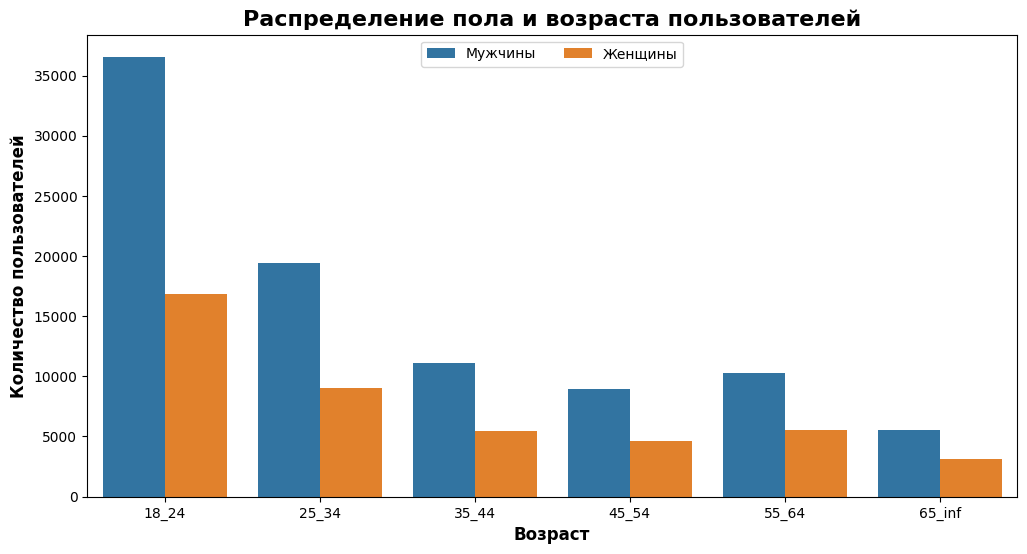

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=u, x='age', hue='sex', order = a)
plt.xlabel('Возраст', fontsize=12, fontweight='bold')
plt.ylabel('Количество пользователей', fontsize=12, fontweight='bold')
plt.title('Распределение пола и возраста пользователей', fontsize=16, fontweight='bold')
plt.legend(['Мужчины', 'Женщины'], fontsize=10, ncol=2, loc='upper center')
plt.show()

In [16]:
ratings

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01
...,...,...,...,...,...
1533073,76968,285394,95,NaN,2019-12-31
1533074,153877,285394,76,5.0,2019-12-31
1533075,90021,73789,97,NaN,2019-12-31
1533076,6452,77993,39,NaN,2019-12-31


In [17]:
users_ratings = users.merge(ratings, on = 'user_id')

In [18]:
users_ratings

,user_id,age,sex,item_id,progress,rating,start_date
0,1,45_54,NaN,284459,35,NaN,2018-02-26
1,1,45_54,NaN,38578,25,4.0,2018-04-17
2,1,45_54,NaN,197953,45,5.0,2018-06-20
3,1,45_54,NaN,193138,37,5.0,2018-07-03
4,1,45_54,NaN,216356,100,NaN,2019-02-17
...,...,...,...,...,...,...,...
1399998,159611,35_44,0.0,231358,93,NaN,2018-11-15
1399999,159611,35_44,0.0,185708,55,5.0,2019-06-27
1400000,159611,35_44,0.0,99055,0,NaN,2019-07-26
1400001,159611,35_44,0.0,321195,98,NaN,2019-12-17


In [19]:
#зависимость средней оценки от пола пользователя
users_ratings.groupby('sex')[['rating']].mean()

,rating
sex,
0.0,4.588983
1.0,4.574993


In [20]:
#зависимость средней оценки от возраста пользователя
users_ratings.groupby('age')[['rating']].mean()

,rating
age,
18_24,4.616336
25_34,4.605920
35_44,4.594518
45_54,4.585833
55_64,4.507952
65_inf,4.525259


In [21]:
users_ratings['sex'] = users_ratings['sex'].map({0.0:'Мужчины', 1.0:'Женщины'})
age_sex_ratings = users_ratings.groupby(['age', 'sex'])[['rating']].mean()
age_sex_ratings

rating
age    sex              
18_24  Женщины  4.614404
       Мужчины  4.618551
25_34  Женщины  4.597734
       Мужчины  4.611819
35_44  Женщины  4.564111
       Мужчины  4.617775
45_54  Женщины  4.604317
       Мужчины  4.577381
55_64  Женщины  4.533316
       Мужчины  4.497678
65_inf Женщины  4.451341
       Мужчины  4.576918

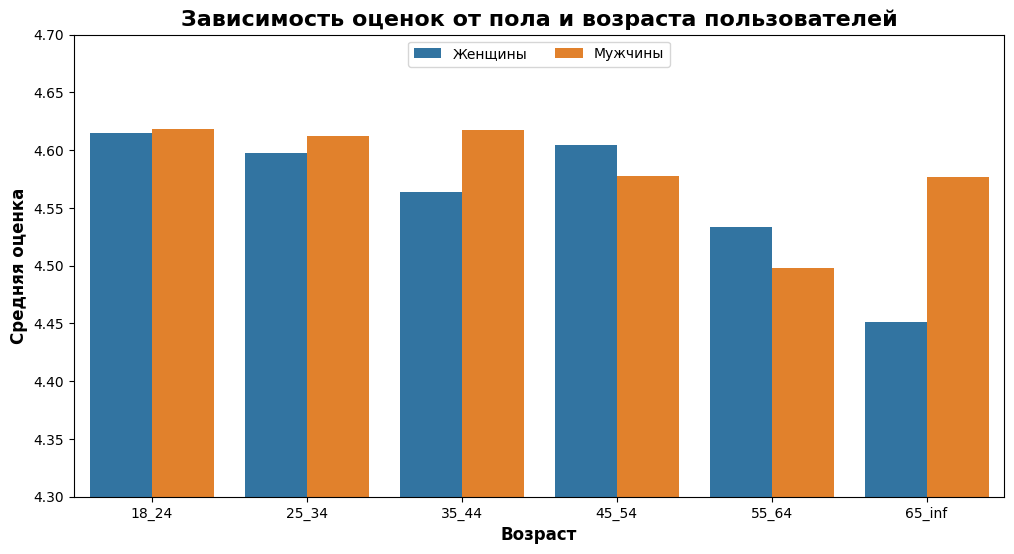

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=age_sex_ratings, x='age',y='rating', hue='sex')
plt.xlabel('Возраст', fontsize=12, fontweight='bold')
plt.ylabel('Средняя оценка', fontsize=12, fontweight='bold')
plt.ylim((4.3, 4.7))
plt.title('Зависимость оценок от пола и возраста пользователей', fontsize=16, fontweight='bold')
plt.legend(fontsize=10, ncol=2, loc='upper center')
plt.show()

# Холодный старт

In [23]:
users_ratings.head()

,user_id,age,sex,item_id,progress,rating,start_date
0,1,45_54,NaN,284459,35,NaN,2018-02-26
1,1,45_54,NaN,38578,25,4.0,2018-04-17
2,1,45_54,NaN,197953,45,5.0,2018-06-20
3,1,45_54,NaN,193138,37,5.0,2018-07-03
4,1,45_54,NaN,216356,100,NaN,2019-02-17


In [24]:
items.head()

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873


In [45]:
data = users_ratings.merge(items, left_on='item_id', right_on='id')

In [46]:
data = data[['user_id','age','sex','item_id','title','genres','authors','rating']]

In [5]:
# data.to_csv('data.csv', index = False)
# data = pd.read_csv('Data/data.csv')

In [6]:
data.head()

,user_id,age,sex,item_id,title,genres,authors,rating
0,1,45_54,NaN,284459,История государства Российского. Том 8. Велики...,"Общая история,Литература 19 века",Николай Карамзин,NaN
1,1,45_54,NaN,38578,4321,Современная зарубежная литература,Пол Остер,4.0
2,1,45_54,NaN,197953,Оружие возмездия,Современная русская литература,Виктор Пелевин,5.0
3,1,45_54,NaN,193138,Советы специалиста. Не спешите стареть!,"Возрастная психология,Здоровье,Геронтология",Михаил Либинтов,5.0
4,1,45_54,NaN,216356,Вдова мастера теней,"Героическое фэнтези,Любовное фэнтези",Валентина Савенко,NaN


In [33]:
# средняя оценка, число оценок и число прочтений по каждой книге
grouped_data = data.groupby('title').agg(
    rating_mean = ('rating', 'mean'),rating_count = ('rating', 'count'),read_count = ('item_id', 'count'))

In [34]:
grouped_data.head()

,rating_mean,rating_count,read_count
title,,,
# 20 восьмая,4.769231,13,43
# DUO,5.000000,3,19
# Me Too. Роман,4.875000,8,25
# Партия,5.000000,2,17
#1917: Человек из раньшего времени. Библиотека «Проекта 1917»,4.500000,4,13


In [35]:
# книги с максимальным средним рейтингом
grouped_rating = grouped_data.sort_values('rating_mean', ascending=False)
grouped_rating.head(10)

,rating_mean,rating_count,read_count
title,,,
Миф Атлантиды,5.0,2,20
Найди меня под цветущей сакурой! Лола-2,5.0,1,14
Найденыш Тоффи,5.0,2,15
Найденные во времени,5.0,1,12
Называй меня Рица,5.0,1,8
"Назад, в будущее! 600 рецептов советской кухни",5.0,1,9
Назад в СССР с кучей баксов. История перемещения во времени,5.0,3,11
Назад в Афган,5.0,1,7
Наживка для резидента,5.0,2,11


In [37]:
# самые популярные книги по числу прочтений
grouped_data.sort_values('read_count', ascending=False).head(10)

,rating_mean,rating_count,read_count
title,,,
"Сила подсознания, или Как изменить жизнь за 4 недели",4.666667,117,5962
Самая таинственная тайна и другие сюжеты,4.619048,21,2547
Противостояние,4.626374,91,2209
Яблоки из сада Шлицбутера,4.838028,142,2167
Сказки для идиотов (сборник),4.604651,43,2159
Зелёная миля,4.812500,16,2142
Снеговик,4.685897,312,2128
Инферно,4.776699,103,2008
Зулейха открывает глаза,4.762852,603,1950


In [36]:
# книги с максимальным средним рейтингом и числом оценок не менее 25
grouped_rating[grouped_rating['rating_count'] >= 25].head(10)

,rating_mean,rating_count,read_count
title,,,
Код да Винчи,5.000000,37,347
Сундук мертвеца,5.000000,28,143
Ангелы и демоны,4.978261,46,279
"Астра. Беспокойное счастье, или Секреты маленького дракона",4.972222,36,125
Вся правда о нас,4.971429,35,223
Дальше жить,4.971429,35,537
Меч Предназначения,4.968750,32,219
Опасно быть студентом,4.968750,64,408
Алмазная колесница,4.968254,63,292


In [38]:
# взвешенный рейтинг, учитывающий средний рейтинг и число оценок
min_marks = 25
grouped_data['final_rating'] = grouped_data.apply(
    lambda x: (x.rating_count / (x.rating_count + min_marks) * x.rating_mean) + (min_marks / (x.rating_count + min_marks) * grouped_data.rating_mean.mean()),axis = 1)

In [39]:
grouped_data.sort_values('final_rating', ascending=False).head(10)

,rating_mean,rating_count,read_count,final_rating
title,,,,
Долина драконов. Магическая Практика,4.914729,129,464,4.857582
Опасно быть студентом,4.968750,64,408,4.854692
Алмазная колесница,4.968254,63,292,4.853041
"Каникулы в Раваншире, или Свадьбы не будет!",4.907407,108,340,4.842614
Обрученные кровью. Выбор,4.891667,120,308,4.834949
Записки юного врача,4.897196,107,708,4.833846
Алая печать. Академия Сиятельных,4.892857,112,275,4.832610
Ангелы и демоны,4.978261,46,279,4.831938
Обрученные кровью. Отбор,4.880000,125,415,4.827118


In [40]:
data.age.value_counts()

age
18_24     458996
25_34     284380
55_64     199821
35_44     184753
45_54     157447
65_inf    113499
Name: count, dtype: int64

In [3]:
def cold_start(sex = '', age = ''):
    ''' Получить 10 лучших фильмов по 
    взвешенному рейтингу для указанных 
    пола и возраста'''
    df = data
    if sex:
        df = df[df['sex'] == sex]
    if age:
        young = ['18_24','25_34']
        older = ['35_44','45_54','55_64', '65_inf']
        if age in young:
            df = df[df['age'].isin(young)]
        if age in older:
            df = df[df['age'].isin(older)]
    grouped_data = df.groupby('title').agg(rating_mean = ('rating', 'mean'),rating_count = ('rating', 'count'))
    min_marks = 10
    grouped_data['final_rating'] = grouped_data.apply(lambda x: (x.rating_count / (x.rating_count + min_marks) * x.rating_mean) + (min_marks / (x.rating_count + min_marks) * grouped_data.rating_mean.mean()),axis = 1)
    res = grouped_data[['final_rating']].sort_values('final_rating', ascending=False).head(10)
    
    return res

### Примеры работы функции

In [9]:
cold_start(sex = 'Мужчины')

,final_rating
title,
Опасно быть студентом,4.910855
Алмазная колесница,4.909402
Порочный,4.898868
Долина драконов. Магическая Практика,4.895350
Верховная Ведьма,4.893026
Ангелы и демоны,4.888569
Код да Винчи,4.882468
Урок пятый: Как не запутаться в древних клятвах,4.881662
"То, что делает меня",4.877910


In [10]:
cold_start(sex = 'Женщины')

,final_rating
title,
Плацдарм для одиночки,4.934281
Плотность огня,4.855512
Меч Предназначения,4.848167
Планета Вода (сборник с иллюстрациями),4.842745
Алмазная колесница,4.836268
Бородино,4.836268
Левиафан,4.831496
Рубеж атаки,4.824567
Шаг через бездну,4.823874


In [11]:
cold_start(age = '25_34')

,final_rating
title,
Тринадцатая сказка,4.910894
Записки юного врача,4.904294
Обрученные кровью. Выбор,4.898883
Долина драконов. Магическая Практика,4.898883
Манюня,4.898338
Алая печать. Академия Сиятельных,4.895455
Академия магического права. Брюнетка в бою,4.893125
Магическая Экспедиция,4.892330
Алмазная колесница,4.890312


In [12]:
cold_start(age = '55_64')

,final_rating
title,
Опасно быть студентом,4.873599
Космоолухи: рядом. Том 1,4.867314
"Астра. Беспокойное счастье, или Секреты маленького дракона",4.857107
Бородино,4.857107
Алмазная колесница,4.853937
"То, что делает меня",4.853347
"Каникулы в Раваншире, или Свадьбы не будет!",4.849704
Сундук мертвеца,4.847572
Код да Винчи,4.847572


In [13]:
cold_start(age = '55_64', sex = 'Мужчины')

,final_rating
title,
Синдром Петрушки,4.878026
Опасно быть студентом,4.877488
"То, что делает меня",4.863241
Верховная Ведьма,4.854920
Алмазная колесница,4.854418
Долина драконов. Магическая Практика,4.849814
Мужская логика 8-го Марта,4.849565
На одном дыхании!,4.849565
Тысяча сияющих солнц,4.847981


In [14]:
cold_start(age = '25_34', sex = 'Женщины')

,final_rating
title,
Рубеж атаки,4.867116
S-T-I-K-S. Территория везучих,4.847430
Плацдарм для одиночки,4.847430
Цветы для Элджернона,4.844867
Шестой Дозор,4.834858
Плотность огня,4.829354
Первому игроку приготовиться,4.820896
Меч Предназначения,4.820896
"Коронация, или Последний из романов",4.820896


# Коллаборативная фильтрация

In [47]:
data.head()

,user_id,age,sex,item_id,title,genres,authors,rating
0,1,45_54,NaN,284459,История государства Российского. Том 8. Велики...,"Общая история,Литература 19 века",Николай Карамзин,NaN
1,1,45_54,NaN,38578,4321,Современная зарубежная литература,Пол Остер,4.0
2,1,45_54,NaN,197953,Оружие возмездия,Современная русская литература,Виктор Пелевин,5.0
3,1,45_54,NaN,193138,Советы специалиста. Не спешите стареть!,"Возрастная психология,Здоровье,Геронтология",Михаил Либинтов,5.0
4,1,45_54,NaN,216356,Вдова мастера теней,"Героическое фэнтези,Любовное фэнтези",Валентина Савенко,NaN


In [13]:
data.isna().sum()

user_id          0
age           1107
sex          59409
item_id          0
title            0
genres         433
authors      95465
rating     1137378
dtype: int64

In [95]:
# удалим строки без рейтинга
data.dropna(subset = 'rating', inplace = True)

In [89]:
# заполним пропуски в признаках возраст и пол
data['age'] = data['age'].fillna('unknown')
data['sex'] = data['sex'].fillna('unknown')

In [22]:
data.isna().sum()

user_id        0
age            0
sex            0
item_id        0
title          0
genres        64
authors    15264
rating         0
dtype: int64

In [7]:
from surprise import KNNWithMeans, KNNBasic, KNNWithZScore, KNNBaseline
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [8]:
df_data = pd.DataFrame({
    'uid': data.user_id,
    'iid': data.item_id,
    'rating': data.rating
})

In [9]:
df_data = df_data.reset_index().drop('index', axis = 1)

In [10]:
df_data

,uid,iid,rating
0,1,284459,NaN
1,1,38578,4.0
2,1,197953,5.0
3,1,193138,5.0
4,1,216356,NaN
...,...,...,...
1399998,159611,231358,NaN
1399999,159611,185708,5.0
1400000,159611,99055,NaN
1400001,159611,321195,NaN


In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262625 entries, 0 to 262624
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   uid     262625 non-null  int64  
 1   iid     262625 non-null  int64  
 2   rating  262625 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


In [11]:
# изменим тип данных, чтобы уменьшить размер памяти датасета
df_data['uid'] = df_data['uid'].astype('int32')
df_data['iid'] = df_data['iid'].astype('int32')
df_data['rating'] = df_data['rating'].astype('float16')

In [28]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262625 entries, 0 to 262624
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   uid     262625 non-null  int32  
 1   iid     262625 non-null  int32  
 2   rating  262625 non-null  float16
dtypes: float16(1), int32(2)
memory usage: 2.5 MB


In [112]:
#df_data.to_csv('df_data.csv', index = False)
#df_data = pd.read_csv('Data/df_data.csv')

In [195]:
df_data.rating.min(), df_data.rating.max()

(1.0, 5.0)

In [12]:
reader = Reader(rating_scale=(1.0, 5.0))
dataset = Dataset.load_from_df(df_data, reader)

In [79]:
algos = (
    KNNWithZScore(),
    KNNBasic(),
    KNNWithMeans(),
    KNNBaseline(),
 )

In [80]:
# перебор алгоритмов семейства KNN со стандартными параметрами
benchmark_kNN = pd.DataFrame()
for algo in algos:
    results = cross_validate(algo, dataset, measures=['RMSE'], cv=5,verbose = False)
    res = pd.DataFrame.from_dict(results).agg('mean')
    benchmark_kNN = pd.concat([benchmark_kNN, res], axis = 1)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [81]:
benchmark_kNN.columns = ['KNNWithZScore','KNNBasic','KNNWithMeans','KNNBaseline']
benchmark_kNN

,KNNWithZScore,KNNBasic,KNNWithMeans,KNNBaseline
test_rmse,0.874266,0.872356,0.871867,0.873110
fit_time,11.634857,10.543440,9.484860,10.391113
test_time,56.286358,46.165234,40.682612,41.900615


In [13]:
from surprise import SVD, SlopeOne, NMF, CoClustering
algos = (
    SVD(),
    SlopeOne(),
    NMF(),
    CoClustering()
 )

In [83]:
# перебор других алгоритмов 
benchmark_others = pd.DataFrame()
for algo in algos:
    results = cross_validate(algo, dataset, measures=['RMSE'], cv=5,verbose = False)
    res = pd.DataFrame.from_dict(results).agg('mean')
    benchmark_others = pd.concat([benchmark_others, res], axis = 1)

In [84]:
benchmark_others.columns = ['SVD','SlopeOne','NMF','CoClustering']
benchmark_others

,SVD,SlopeOne,NMF,CoClustering
test_rmse,0.864213,0.862621,0.931639,0.878629
fit_time,2.663678,6.983891,6.671373,9.631975
test_time,0.483001,38.699975,0.741246,0.722523


### Найдем лучшие гиперпараметры для моделей SVD, KNN и MNF

In [87]:
# подбор гиперпараметров для SVD
param_grid = {
    "n_epochs": [20, 30, 50],
    "lr_all": [0.001,0.005, 0.01],
    "reg_all": [0.05],
    "n_factors":[50, 100, 150],
    'random_state' : [8]
}
gs_SVD = GridSearchCV(SVD, param_grid, measures=["rmse"], refit=True, cv=5)

gs_SVD.fit(dataset)

In [88]:
print("BEST RMSE SVD: \t", gs_SVD.best_score["rmse"])
print("BEST params SVD: \t", gs_SVD.best_params["rmse"])

BEST RMSE: 	 0.8627629347087235
BEST params: 	 {'n_epochs': 50, 'lr_all': 0.001, 'reg_all': 0.05, 'n_factors': 50, 'random_state': 8}


In [89]:
# перебор метрик близости для KNN, а также выбор между user_based и item_based
sim_options = {
    "name": ['cosine','pearson','pearson_baseline'],
    "user_based": [True,False]
}

In [95]:
# подбор количества соседей
param_grid = {
    'sim_options' : sim_options,
    "k": [20,30,40,50,60],
    'random_state' : [8]
}
gs_knn = GridSearchCV(KNNBaseline, param_grid, measures=["rmse"], refit=True, cv=5)
gs_knn.fit(dataset)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity ma

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [96]:
print("BEST RMSE KNN: \t", gs_knn.best_score["rmse"])
print("BEST params KNN: \t", gs_knn.best_params["rmse"])

BEST RMSE: 	 0.8683218822365528
BEST params: 	 {'sim_options': {'name': 'cosine', 'user_based': True}, 'k': 60, 'random_state': 8}


In [139]:
# подбор гиперпараметров для NMF
param_grid = {
    "n_epochs": [30, 50, 80],
    "biased": [True, False],
    "n_factors":[10, 20, 30],
    'random_state' : [8]
}
gs_NMF = GridSearchCV(NMF, param_grid, measures=["rmse"], refit=True, cv=5)

gs_NMF.fit(dataset)

In [140]:
print("BEST RMSE NMF: \t", gs_NMF.best_score["rmse"])
print("BEST params NMF: \t", gs_NMF.best_params["rmse"])

BEST RMSE NMF: 	 0.9397252184127675
BEST params NMF: 	 {'n_epochs': 50, 'biased': True, 'n_factors': 10, 'random_state': 8}


In [14]:
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from surprise import dump

### Обучим 3 модели с оптимальными гиперпараметрами

In [289]:
algo_svd = SVD(n_epochs = 50, lr_all = 0.001, reg_all = 0.05, n_factors = 50, random_state = 8)  
algo_knn = KNNBasic(k = 60, sim_optoins = {'name': 'cosine', 'user_based': True}, random_state = 8)
algo_nmf = NMF(n_epochs = 50, biased = True, n_factors = 10, random_state = 8)

In [205]:
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=8)

In [290]:
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)
rmse(predictions_svd)
dump.dump('dump_SVD', predictions_svd, algo_svd)

RMSE: 0.8250


0.8250432402718261

In [212]:
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
rmse(predictions_knn)
dump.dump('dump_KNN', predictions_knn, algo_knn)

RMSE: 0.8839


0.8838721005347462

In [207]:
algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)
rmse(predictions_nmf)
dump.dump('dump_NMF', predictions_nmf, algo_nmf)

RMSE: 0.8550


In [15]:
#predictions_svd, algo_svd = dump.load('Models/dump_SVD')
#predictions_nmf, algo_nmf = dump.load('Models/dump_NMF')
#predictions_knn, algo_knn = dump.load('Models/dump_KNN')

# Гибридные модели

In [16]:
df_svd = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'pred_svd', 'details'])    
df_knn = pd.DataFrame(predictions_knn, columns=['uid', 'iid', 'rui', 'pred_knn', 'details'])
df_nmf = pd.DataFrame(predictions_nmf, columns=['uid', 'iid', 'rui', 'pred_nmf', 'details'])

In [17]:
df_svd

,uid,iid,rui,pred_svd,details
0,122554,109991,5.0,4.413574,{'was_impossible': False}
1,83,100052,4.0,4.782649,{'was_impossible': False}
2,47624,235815,4.0,4.581132,{'was_impossible': False}
3,47993,18291,5.0,4.735673,{'was_impossible': False}
4,43416,175135,3.0,4.367834,{'was_impossible': False}
...,...,...,...,...,...
52520,141137,299225,5.0,4.435556,{'was_impossible': False}
52521,155658,217060,2.0,4.416466,{'was_impossible': False}
52522,89403,188414,4.0,4.710393,{'was_impossible': False}
52523,16060,264843,5.0,4.460565,{'was_impossible': False}


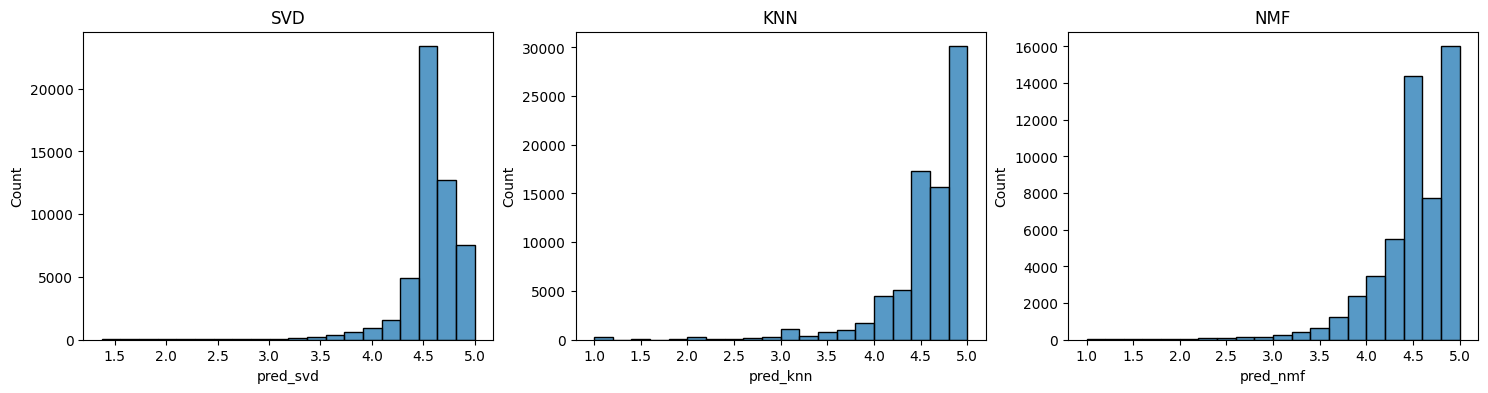

In [42]:
# распределение оценок полученных моделей
plt.figure(figsize= (18,4))
plt.subplot(1, 3, 1)
sns.histplot(data = df_svd, x = 'pred_svd', bins = 20)
plt.title('SVD')
plt.subplot(1, 3, 2)
sns.histplot(data = df_knn, x = 'pred_knn', bins = 20)
plt.title('KNN')
plt.subplot(1, 3, 3)
sns.histplot(data = df_nmf, x = 'pred_nmf', bins = 20)
plt.title('NMF');

In [26]:
# сводная таблица с предсказаниями всех моделей
predicts = df_svd.copy()
predicts['pred_knn'] = df_knn['pred_knn']
predicts['pred_nmf'] = df_nmf['pred_nmf']
predicts.drop('details', axis = 1, inplace = True)

In [27]:
predicts

,uid,iid,rui,pred_svd,pred_knn,pred_nmf
0,122554,109991,5.0,4.413574,4.041632,4.948195
1,83,100052,4.0,4.782649,4.421421,4.840393
2,47624,235815,4.0,4.581132,5.000000,4.548285
3,47993,18291,5.0,4.735673,5.000000,4.649990
4,43416,175135,3.0,4.367834,5.000000,4.444571
...,...,...,...,...,...,...
52520,141137,299225,5.0,4.435556,4.582026,4.098051
52521,155658,217060,2.0,4.416466,5.000000,4.481201
52522,89403,188414,4.0,4.710393,4.633329,4.433943
52523,16060,264843,5.0,4.460565,4.818270,4.482495


In [29]:
#predicts.to_csv('predicts_cf.csv',index = False)
#predicts = pd.read_csv('Data/predicts_cf.csv')

### Предсказания с максимальным рейтингом каждой из моделей

In [30]:
predicts.sort_values('pred_svd', ascending=False).head(10)

,uid,iid,rui,pred_svd,pred_knn,pred_nmf
19399,101837,230954,5.0,5.0,5.000000,4.985570
20395,29293,83171,5.0,5.0,4.582026,5.000000
5254,130530,264099,5.0,5.0,4.503502,4.987569
10325,101095,230592,5.0,5.0,5.000000,5.000000
39772,114659,38162,5.0,5.0,4.725378,5.000000
29573,21888,45920,5.0,5.0,4.445024,4.924754
50840,150857,25545,5.0,5.0,3.933769,5.000000
22768,18959,303768,5.0,5.0,4.869958,5.000000
37318,105231,103240,5.0,5.0,4.251721,5.000000
39784,55319,11525,5.0,5.0,4.582026,5.000000


In [435]:
predicts.sort_values('pred_knn', ascending=False).head(10)

,uid,iid,rui,pred_svd,pred_knn,pred_nmf
5571,125052,23155,4.0,4.446962,5.000000,4.122727
48237,146044,58995,5.0,4.686092,5.000000,5.000000
34238,150807,295457,5.0,4.582332,4.985638,4.582332
21481,74775,247329,5.0,4.553812,4.985638,3.985343
31821,143644,208417,5.0,4.597687,4.985346,4.578158
32773,78620,209697,5.0,4.821825,4.985346,5.000000
23821,144027,4382,5.0,4.707097,4.985145,4.988929
31958,93851,83742,5.0,4.631112,4.985145,4.836075
35844,72539,160033,5.0,4.559665,4.971428,4.095453
23310,16731,210977,5.0,4.547355,4.971428,4.222112


In [33]:
predicts.sort_values('pred_nmf', ascending=False).head(10)

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred
7631,147102,31647,5.0,4.879605,4.703687,5.0,4.861097
25932,74716,67254,5.0,5.000000,5.000000,5.0,5.000000
25907,28971,89146,5.0,4.953272,5.000000,5.0,4.984424
32803,36696,112990,5.0,4.853548,3.758912,5.0,4.537487
44411,65784,59051,4.0,4.881817,5.000000,5.0,4.960606
11008,29711,222142,5.0,4.530035,5.000000,5.0,4.843345
32797,144831,235773,5.0,4.987382,5.000000,5.0,4.995794
25900,77473,200401,5.0,4.724500,5.000000,5.0,4.908167
32790,40951,165141,5.0,4.901447,5.000000,5.0,4.967149
49006,104975,15688,5.0,5.000000,4.926366,5.0,4.975455


In [231]:
from sklearn.metrics import root_mean_squared_error

In [293]:
root_mean_squared_error(predicts.rui, predicts.pred_svd)

0.8250432402718261

In [233]:
root_mean_squared_error(predicts.rui, predicts.pred_knn)

0.8838721005347462

In [234]:
root_mean_squared_error(predicts.rui, predicts.pred_nmf)

0.8549542661607455

In [31]:
# усредним предсказания всех моделей
predicts['mean_pred'] = predicts.apply(lambda x: np.mean([x.pred_svd, x.pred_knn, x.pred_nmf]), axis = 1)

In [32]:
predicts.sort_values('mean_pred', ascending=False).head(10)

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred
12767,98430,88397,5.0,5.0,5.0,5.0,5.0
33301,27259,9865,5.0,5.0,5.0,5.0,5.0
6317,159387,136255,5.0,5.0,5.0,5.0,5.0
17322,6247,164117,5.0,5.0,5.0,5.0,5.0
5443,20697,11525,5.0,5.0,5.0,5.0,5.0
27055,72334,18066,5.0,5.0,5.0,5.0,5.0
6007,140910,250354,5.0,5.0,5.0,5.0,5.0
3004,99355,223365,5.0,5.0,5.0,5.0,5.0
46195,136294,48926,5.0,5.0,5.0,5.0,5.0
37441,12209,92455,5.0,5.0,5.0,5.0,5.0


In [248]:
# метрика хуже чем у модели SVD
root_mean_squared_error(predicts.rui, predicts.mean_pred)

0.829319283365342

In [35]:
# добавим веса предсказаниям каждой модели в соответствии с их метриками
predicts['wieght_pred'] = predicts.apply(lambda x: x.pred_svd * 0.7 + x.pred_knn * 0.1 + x.pred_nmf * 0.2, axis = 1)

In [37]:
#predicts.to_csv('predicts_cf_ens')

In [259]:
# метрика немного улучшилась
root_mean_squared_error(predicts.rui, predicts.wieght_pred)

0.8237071235553165

### Используем предсказания как признаки для итоговой модели

In [38]:
from catboost import CatBoostRegressor

In [59]:
features = ['pred_svd', 'pred_knn', 'pred_nmf']
target = ['rui']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = predicts[features].drop(target, axis=1, errors="ignore")
y = predicts[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [353]:
model = CatBoostRegressor()

In [360]:
model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=50,
)

Learning rate set to 0.091575
0:	learn: 0.8619119	test: 0.8823839	best: 0.8823839 (0)	total: 36.6ms	remaining: 36.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.840972303
bestIteration = 91

Shrink model to first 92 iterations.


In [361]:
predictions = model.predict(X)

In [362]:
# метрика улучшилась
root_mean_squared_error(predicts.rui, predictions)

0.8182184416367263

In [363]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,pred_svd,58.967258
1,pred_nmf,32.398679
2,pred_knn,8.634063


In [96]:
data

,user_id,age,sex,item_id,title,genres,authors,rating
1,1,45_54,unknown,38578,4321,Современная зарубежная литература,Пол Остер,4.0
2,1,45_54,unknown,197953,Оружие возмездия,Современная русская литература,Виктор Пелевин,5.0
3,1,45_54,unknown,193138,Советы специалиста. Не спешите стареть!,"Возрастная психология,Здоровье,Геронтология",Михаил Либинтов,5.0
7,2,18_24,Мужчины,1938,Ловкая бестия,Современные детективы,Марина Серова,5.0
12,3,65_inf,Мужчины,304732,Нетопырь,"Зарубежные детективы,Триллеры,Полицейские дете...",Ю Несбё,4.0
...,...,...,...,...,...,...,...,...
1399886,159605,18_24,Мужчины,187201,Самая неслучайная встреча,"Зарубежные любовные романы,Короткие любовные р...",Дэни Коллинз,5.0
1399888,159605,18_24,Мужчины,165699,Ремонт иномарок. Двигатель,"Рукоделие и ремесла,Автомобили и ПДД",Илья Мельников,5.0
1399895,159606,25_34,Мужчины,136955,"Тайна мадам Живанши, или Смерть мужьям",Исторические детективы,Антон Чиж,5.0
1399906,159607,25_34,unknown,287036,Женщина в окне,"Зарубежные детективы,Триллеры,Современные дете...",А. Финн,5.0


In [97]:
# добавим к признакам возраст и пол пользователей
predicts_features = predicts.merge(data[['user_id','item_id', 'age', 'sex']], left_on = ['uid','iid'], right_on = ['user_id','item_id'], right_index=False)

In [98]:
predicts_features.drop(['user_id', 'item_id'], axis = 1, inplace = True)

In [99]:
predicts_features.head()

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred,wieght_pred,age,sex
0,122554,109991,5.0,4.413574,4.041632,4.948195,4.467800,4.483304,35_44,Мужчины
1,83,100052,4.0,4.782649,4.421421,4.840393,4.681488,4.758075,35_44,Мужчины
2,47624,235815,4.0,4.581132,5.000000,4.548285,4.709806,4.616450,45_54,Женщины
3,47993,18291,5.0,4.735673,5.000000,4.649990,4.795221,4.744969,unknown,Мужчины
4,43416,175135,3.0,4.367834,5.000000,4.444571,4.604135,4.446398,55_64,Мужчины


In [100]:
predicts_features.shape, predicts.shape

((52525, 10), (52525, 8))

In [442]:
features = ['pred_svd', 'pred_knn', 'pred_nmf', 'age', 'sex']
cat_features = ['age', 'sex']

In [443]:
X = predicts_features[features].drop(target, axis=1, errors="ignore")
y = predicts_features[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [444]:
X.head()

,pred_svd,pred_knn,pred_nmf,age,sex
0,4.413574,4.531110,4.948195,35_44,Мужчины
1,4.782649,4.731316,4.840393,35_44,Мужчины
2,4.581132,4.630021,4.548285,45_54,Женщины
3,4.735673,4.827598,4.649990,unknown,Мужчины
4,4.367834,4.662774,4.444571,55_64,Мужчины


In [366]:
model = CatBoostRegressor(cat_features=cat_features)

In [367]:
model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=50,
)

Learning rate set to 0.091575
0:	learn: 0.8621160	test: 0.8662595	best: 0.8662595 (0)	total: 91.7ms	remaining: 1m 31s
200:	learn: 0.8070323	test: 0.8148926	best: 0.8148926 (200)	total: 8.72s	remaining: 34.7s
400:	learn: 0.7970363	test: 0.8080741	best: 0.8080741 (400)	total: 18.4s	remaining: 27.4s
600:	learn: 0.7887860	test: 0.8025686	best: 0.8025686 (600)	total: 27.9s	remaining: 18.6s
800:	learn: 0.7816534	test: 0.7978500	best: 0.7978500 (800)	total: 37.6s	remaining: 9.34s
999:	learn: 0.7756009	test: 0.7938934	best: 0.7938934 (999)	total: 48.1s	remaining: 0us

bestTest = 0.7938933854
bestIteration = 999



In [368]:
predictions = model.predict(X)

In [369]:
# метрика еще улучшилась
root_mean_squared_error(predicts.rui, predictions)

0.7938933853852382

In [370]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,pred_svd,35.390713
1,pred_nmf,27.073046
2,pred_knn,20.809093
3,age,11.568386
4,sex,5.158762


In [450]:
predicts_features.head()

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred,wieght_pred,age,sex
0,122554,109991,5.0,4.436468,4.531110,4.948195,4.638591,4.608915,35_44,Мужчины
1,83,100052,4.0,4.764569,4.731316,4.840393,4.778759,4.780665,35_44,Мужчины
2,47624,235815,4.0,4.580626,4.630021,4.548285,4.586311,4.580803,45_54,Женщины
3,47993,18291,5.0,4.729286,4.827598,4.649990,4.735625,4.725160,unknown,Мужчины
4,43416,175135,3.0,4.391531,4.662774,4.444571,4.499626,4.461692,55_64,Мужчины


In [101]:
# посчитаем средний рейтинг по пользователям, итемам и добавим их к признакам
predicts_features["user_mean"] = predicts_features.groupby("uid")["rui"].transform("mean")
predicts_features["item_mean"] = predicts_features.groupby("iid")["rui"].transform("mean")

In [102]:
predicts_features.head()

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred,wieght_pred,age,sex,user_mean,item_mean
0,122554,109991,5.0,4.413574,4.041632,4.948195,4.467800,4.483304,35_44,Мужчины,5.000000,5.000000
1,83,100052,4.0,4.782649,4.421421,4.840393,4.681488,4.758075,35_44,Мужчины,4.777778,4.666667
2,47624,235815,4.0,4.581132,5.000000,4.548285,4.709806,4.616450,45_54,Женщины,4.000000,4.000000
3,47993,18291,5.0,4.735673,5.000000,4.649990,4.795221,4.744969,unknown,Мужчины,4.800000,4.625000
4,43416,175135,3.0,4.367834,5.000000,4.444571,4.604135,4.446398,55_64,Мужчины,4.562500,4.375000


In [103]:
#predicts_features.to_csv('features_final.csv')

In [62]:
features = ['pred_svd', 'pred_knn', 'pred_nmf', 'age', 'sex', 'user_mean', 'item_mean']
cat_features = ['age', 'sex']

In [104]:
X = predicts_features[features].drop(target, axis=1, errors="ignore")
y = predicts_features[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = CatBoostRegressor(cat_features=cat_features)

In [106]:
model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=50,
)

Learning rate set to 0.091575
0:	learn: 0.8093108	test: 0.8283967	best: 0.8283967 (0)	total: 62ms	remaining: 1m 1s
200:	learn: 0.3208094	test: 0.3468191	best: 0.3465520 (156)	total: 11s	remaining: 43.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3465519847
bestIteration = 156

Shrink model to first 157 iterations.


In [107]:
predictions = model.predict(X)

In [108]:
#dump.dump('dump_boosting', predictions, model)

In [427]:
root_mean_squared_error(y, predictions)

0.3296171857730279

In [428]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,user_mean,59.306535
1,item_mean,35.291417
2,pred_svd,2.105389
3,pred_nmf,1.433103
4,pred_knn,0.943442
5,age,0.604866
6,sex,0.315247


#### Метрика значительно улучшилась, признаки со средними рейтингами оказались самыми важными

In [110]:
predicts['boosting'] = predictions

In [111]:
predicts

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred,wieght_pred,boosting
0,122554,109991,5.0,4.413574,4.041632,4.948195,4.467800,4.483304,5.011666
1,83,100052,4.0,4.782649,4.421421,4.840393,4.681488,4.758075,4.746362
2,47624,235815,4.0,4.581132,5.000000,4.548285,4.709806,4.616450,3.958706
3,47993,18291,5.0,4.735673,5.000000,4.649990,4.795221,4.744969,4.715821
4,43416,175135,3.0,4.367834,5.000000,4.444571,4.604135,4.446398,4.371589
...,...,...,...,...,...,...,...,...,...
52520,141137,299225,5.0,4.435556,4.582026,4.098051,4.371878,4.382702,4.998394
52521,155658,217060,2.0,4.416466,5.000000,4.481201,4.632555,4.487766,2.046565
52522,89403,188414,4.0,4.710393,4.633329,4.433943,4.592555,4.647397,4.678258
52523,16060,264843,5.0,4.460565,4.818270,4.482495,4.587110,4.500721,4.998691


In [113]:
#predicts.to_csv('predicts_final.csv')

In [112]:
predicts.sort_values('boosting', ascending=False).head(10)

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred,wieght_pred,boosting
1978,56919,244895,5.0,3.945678,5.000000,5.000000,4.648559,4.261974,5.222260
31423,17803,86502,5.0,3.810073,4.582026,3.961299,4.117800,3.917514,5.165102
27176,155199,25439,5.0,3.790001,3.166790,2.443749,3.133513,3.458429,5.126159
29698,146684,291957,5.0,3.888969,3.784792,3.968316,3.880692,3.894420,5.124888
7148,4832,11353,5.0,3.931809,4.246481,3.361090,3.846460,3.849133,5.123621
12735,56919,160933,5.0,3.854849,4.433922,4.010234,4.099668,3.943833,5.114608
1488,141698,103613,5.0,3.844518,4.489038,4.012528,4.115361,3.942572,5.105839
1855,155199,147633,5.0,3.794669,3.448015,3.687192,3.643292,3.738508,5.100678
37191,90339,142275,5.0,4.143252,5.000000,4.624589,4.589280,4.325194,5.099367
31184,24351,221255,5.0,3.634198,3.363026,3.446783,3.481335,3.569598,5.097748


# Оценка моделей с помощью различных метрик

### Precision, Recall, F1_score

In [128]:
predicts_class = predicts.copy()

In [129]:
predicts_class.columns

Index(['uid', 'iid', 'rui', 'pred_svd', 'pred_knn', 'pred_nmf', 'mean_pred',
       'wieght_pred', 'boosting'],
      dtype='object')

Сведем работу нашей модели к задаче классификации, будем предсказывать, релевантен ли объект для пользователя. Релевантными будем считать объекты с рейтингом 4 и 5

In [130]:
threshold = 4.0
predicts_class['rui'] = predicts_class['rui'] >= threshold
predicts_class['pred_svd'] = predicts_class['pred_svd'] >= threshold
predicts_class['pred_knn'] = predicts_class['pred_knn'] >= threshold
predicts_class['pred_nmf'] = predicts_class['pred_nmf'] >= threshold
predicts_class['mean_pred'] = predicts_class['mean_pred'] >= threshold
predicts_class['wieght_pred'] = predicts_class['wieght_pred'] >= threshold
predicts_class['boosting'] = predicts_class['boosting'] >= threshold

In [131]:
predicts_class

,uid,iid,rui,pred_svd,pred_knn,pred_nmf,mean_pred,wieght_pred,boosting
0,122554,109991,True,True,True,True,True,True,True
1,83,100052,True,True,True,True,True,True,True
2,47624,235815,True,True,True,True,True,True,False
3,47993,18291,True,True,True,True,True,True,True
4,43416,175135,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
52520,141137,299225,True,True,True,True,True,True,True
52521,155658,217060,False,True,True,True,True,True,False
52522,89403,188414,True,True,True,True,True,True,True
52523,16060,264843,True,True,True,True,True,True,True


In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [136]:
algos = ['pred_svd', 'pred_knn', 'pred_nmf', 'mean_pred','wieght_pred', 'boosting']
classification_metrics = pd.DataFrame()

In [155]:
for algo in algos:
    precision = precision_score(predicts_class['rui'],predicts_class[algo])
    recall = recall_score(predicts_class['rui'],predicts_class[algo])
    f1 = f1_score(predicts_class['rui'],predicts_class[algo])
    res = pd.DataFrame([precision, recall, f1]).T
    classification_metrics = pd.concat([classification_metrics, res], axis = 0)

In [157]:
classification_metrics.index = algos
classification_metrics.columns = ['precision', 'recall', 'f1']
classification_metrics

,precision,recall,f1
pred_svd,0.906755,0.978508,0.941266
pred_knn,0.893738,0.920314,0.906832
pred_nmf,0.914021,0.916864,0.915440
mean_pred,0.904402,0.969881,0.935997
wieght_pred,0.907009,0.978550,0.941422
boosting,0.990826,0.911027,0.949253


### Precision at k

In [178]:
books_by_user = predicts.groupby('uid')[['iid']].count()
books_by_user.head()

,iid
uid,
8,1
9,1
13,1
16,1
18,1


In [181]:
#пользователи у которых оценено не менее 15 книг
top_users = books_by_user[books_by_user['iid'] >= 15].index

In [184]:
predicts_top_users = predicts[predicts['uid'].isin(top_users)]

In [208]:
def precision_at_k(algo, k = 10):
    precisions = []
    for user in top_users:
        data = predicts_top_users[predicts_top_users['uid'] == user]
        true_top = set(data.sort_values('rui', ascending = False)['iid'].values[:k])
        pred_top = set(data.sort_values(algo, ascending = False)['iid'].values[:k])
        precision = len(true_top.intersection(pred_top)) / 10
        precisions.append(precision)
        
        
    return np.mean(precisions)

In [209]:
precision_at_k('pred_svd')

0.46504559270516715

In [216]:
precision_at_k_metrics = pd.DataFrame()
for algo in algos:
    precision_10 = precision_at_k(algo)
    precision_5 = precision_at_k(algo, k = 5)
    precision_7 = precision_at_k(algo, k = 7)
    res = pd.DataFrame([precision_5, precision_7, precision_10]).T
    precision_at_k_metrics = pd.concat([precision_at_k_metrics, res], axis = 0)

In [217]:
precision_at_k_metrics.index = algos
precision_at_k_metrics.columns = ['precision@5', 'precision@7', 'precision@10']
precision_at_k_metrics

,precision@5,precision@7,precision@10
pred_svd,0.124924,0.241033,0.465046
pred_knn,0.127052,0.230091,0.437994
pred_nmf,0.142553,0.251368,0.482371
mean_pred,0.122796,0.236474,0.460486
wieght_pred,0.126140,0.241945,0.463222
boosting,0.158055,0.277204,0.537386


### NDCG

In [241]:
def dcg(relevances):
    dcg = 0.0
    for i in range(len(relevances)):
        rel = relevances[i]  # Релевантность элемента в позиции i
        position = i + 1  # Позиция элемента (начиная с 1)
        dcg += (2 ** rel -1) / np.log2(position + 1) # Вычисляем DCG для элемента в позиции i и добавляем к общему DCG
        
    return dcg

In [247]:
dcg([5,5,4,4,3,2,2]), dcg([4,5,4,5,2,3,2]), dcg([3,4,5,2,2,4,3]) 

(69.29556194378193, 60.06380439245015, 42.092975539449334)

In [229]:
def ndcg_at_k(algo, k = 10):
    ndcgs = []
    for user in top_users:
        data = predicts_top_users[predicts_top_users['uid'] == user]
        relevance = data.sort_values(algo, ascending = False)['rui'].values[:k]
        dcg_score = dcg(relevance)
        ideal_ranking = sorted(relevance, reverse=True)
        idcg_score = dcg(ideal_ranking)
        ndcg_score = dcg_score / idcg_score
        ndcgs.append(ndcg_score)
              
    return np.mean(ndcgs)

In [245]:
ndcg_at_k('pred_svd')

0.9555321292907699

In [250]:
ndcg_metrics = pd.DataFrame()
for algo in algos:
    ndcg_10 = ndcg_at_k(algo)
    ndcg_5 = ndcg_at_k(algo, k = 5)
    ndcg_20 = ndcg_at_k(algo, k = 20)
    ndcg_30 = ndcg_at_k(algo, k = 30)
    res = pd.DataFrame([ndcg_5, ndcg_10, ndcg_20, ndcg_30]).T
    ndcg_metrics = pd.concat([ndcg_metrics, res], axis = 0)

In [251]:
ndcg_metrics.index = algos
ndcg_metrics.columns = ['ndcg@5', 'ndcg@10', 'ndcg@20', 'ndcg@30']
ndcg_metrics

,ndcg@5,ndcg@10,ndcg@20,ndcg@30
pred_svd,0.963880,0.955532,0.954387,0.954332
pred_knn,0.954457,0.947209,0.943814,0.943605
pred_nmf,0.959327,0.954110,0.953706,0.953358
mean_pred,0.964917,0.956284,0.953769,0.953030
wieght_pred,0.967820,0.960378,0.957107,0.956925
boosting,0.996636,0.993726,0.990916,0.990251
